In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv("DATA/Indian Liver Patient Dataset (ILPD).csv")

In [3]:
df.shape

(582, 11)

In [4]:
df.iloc[0]

65          62
Female    Male
0.7       10.9
0.1        5.5
187        699
16          64
18         100
6.8        7.5
3.3        3.2
0.9       0.74
1            1
Name: 0, dtype: object

# ADDING COLUMNS NAMES

Attribute Information:

1. Age Age of the patient
2. Gender Gender of the patient
3. TB Total Bilirubin
4. DB Direct Bilirubin
5. Alkphos Alkaline Phosphotase
6. Sgpt Alamine Aminotransferase
7. Sgot Aspartate Aminotransferase
8. TP Total Protiens
9. ALB Albumin
10. A/G Ratio Albumin and Globulin Ratio
11. Selector field used to split the data into two sets (labeled by the experts)

In [5]:
df.columns=['Age','Gender','TB','DB','Alkphos','Sgpt','Sgot','TP','ALB','A/G Ratio' ,'Selector field']

In [6]:
df.head(5)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector field
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


# Exploratory Data Analysis

In [7]:
df.isnull().sum()

Age               0
Gender            0
TB                0
DB                0
Alkphos           0
Sgpt              0
Sgot              0
TP                0
ALB               0
A/G Ratio         4
Selector field    0
dtype: int64

In [8]:
df['A/G Ratio'].mean()

0.9471453287197237

In [9]:
df=df.fillna(0.94)

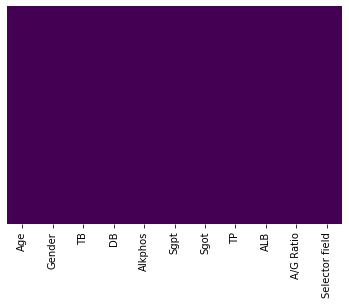

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No data is missing 

In [11]:
df.describe()
        

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector field
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,44.711340,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947096,1.286942
std,16.181921,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.318760,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [12]:
corr=df[::][df.columns[:10]].corr()

Text(0.5, 1, 'Correlation matrix')

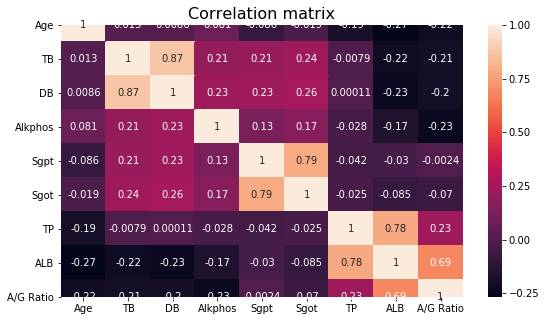

In [13]:
ax=plt.subplots(figsize=(9,5))
ax=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)
ax.set_title('Correlation matrix', fontsize=16, fontdict={})

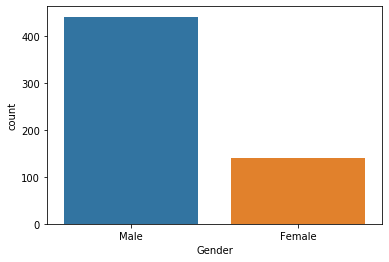

In [14]:
sns.countplot(x='Gender',data=df)

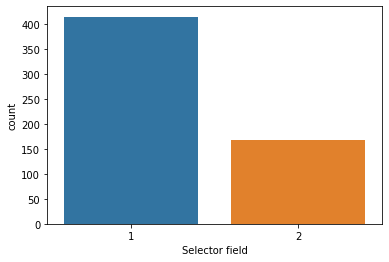

In [15]:
sns.countplot(x='Selector field',data=df)

G:\Anacoda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


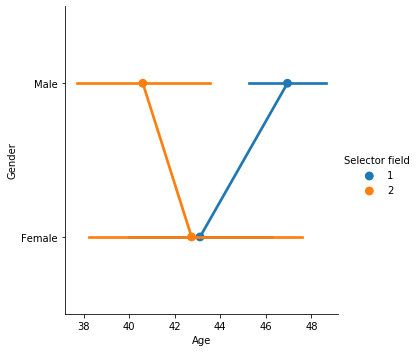

In [16]:
sns.factorplot(x="Age", y="Gender", hue="Selector field", data=df)

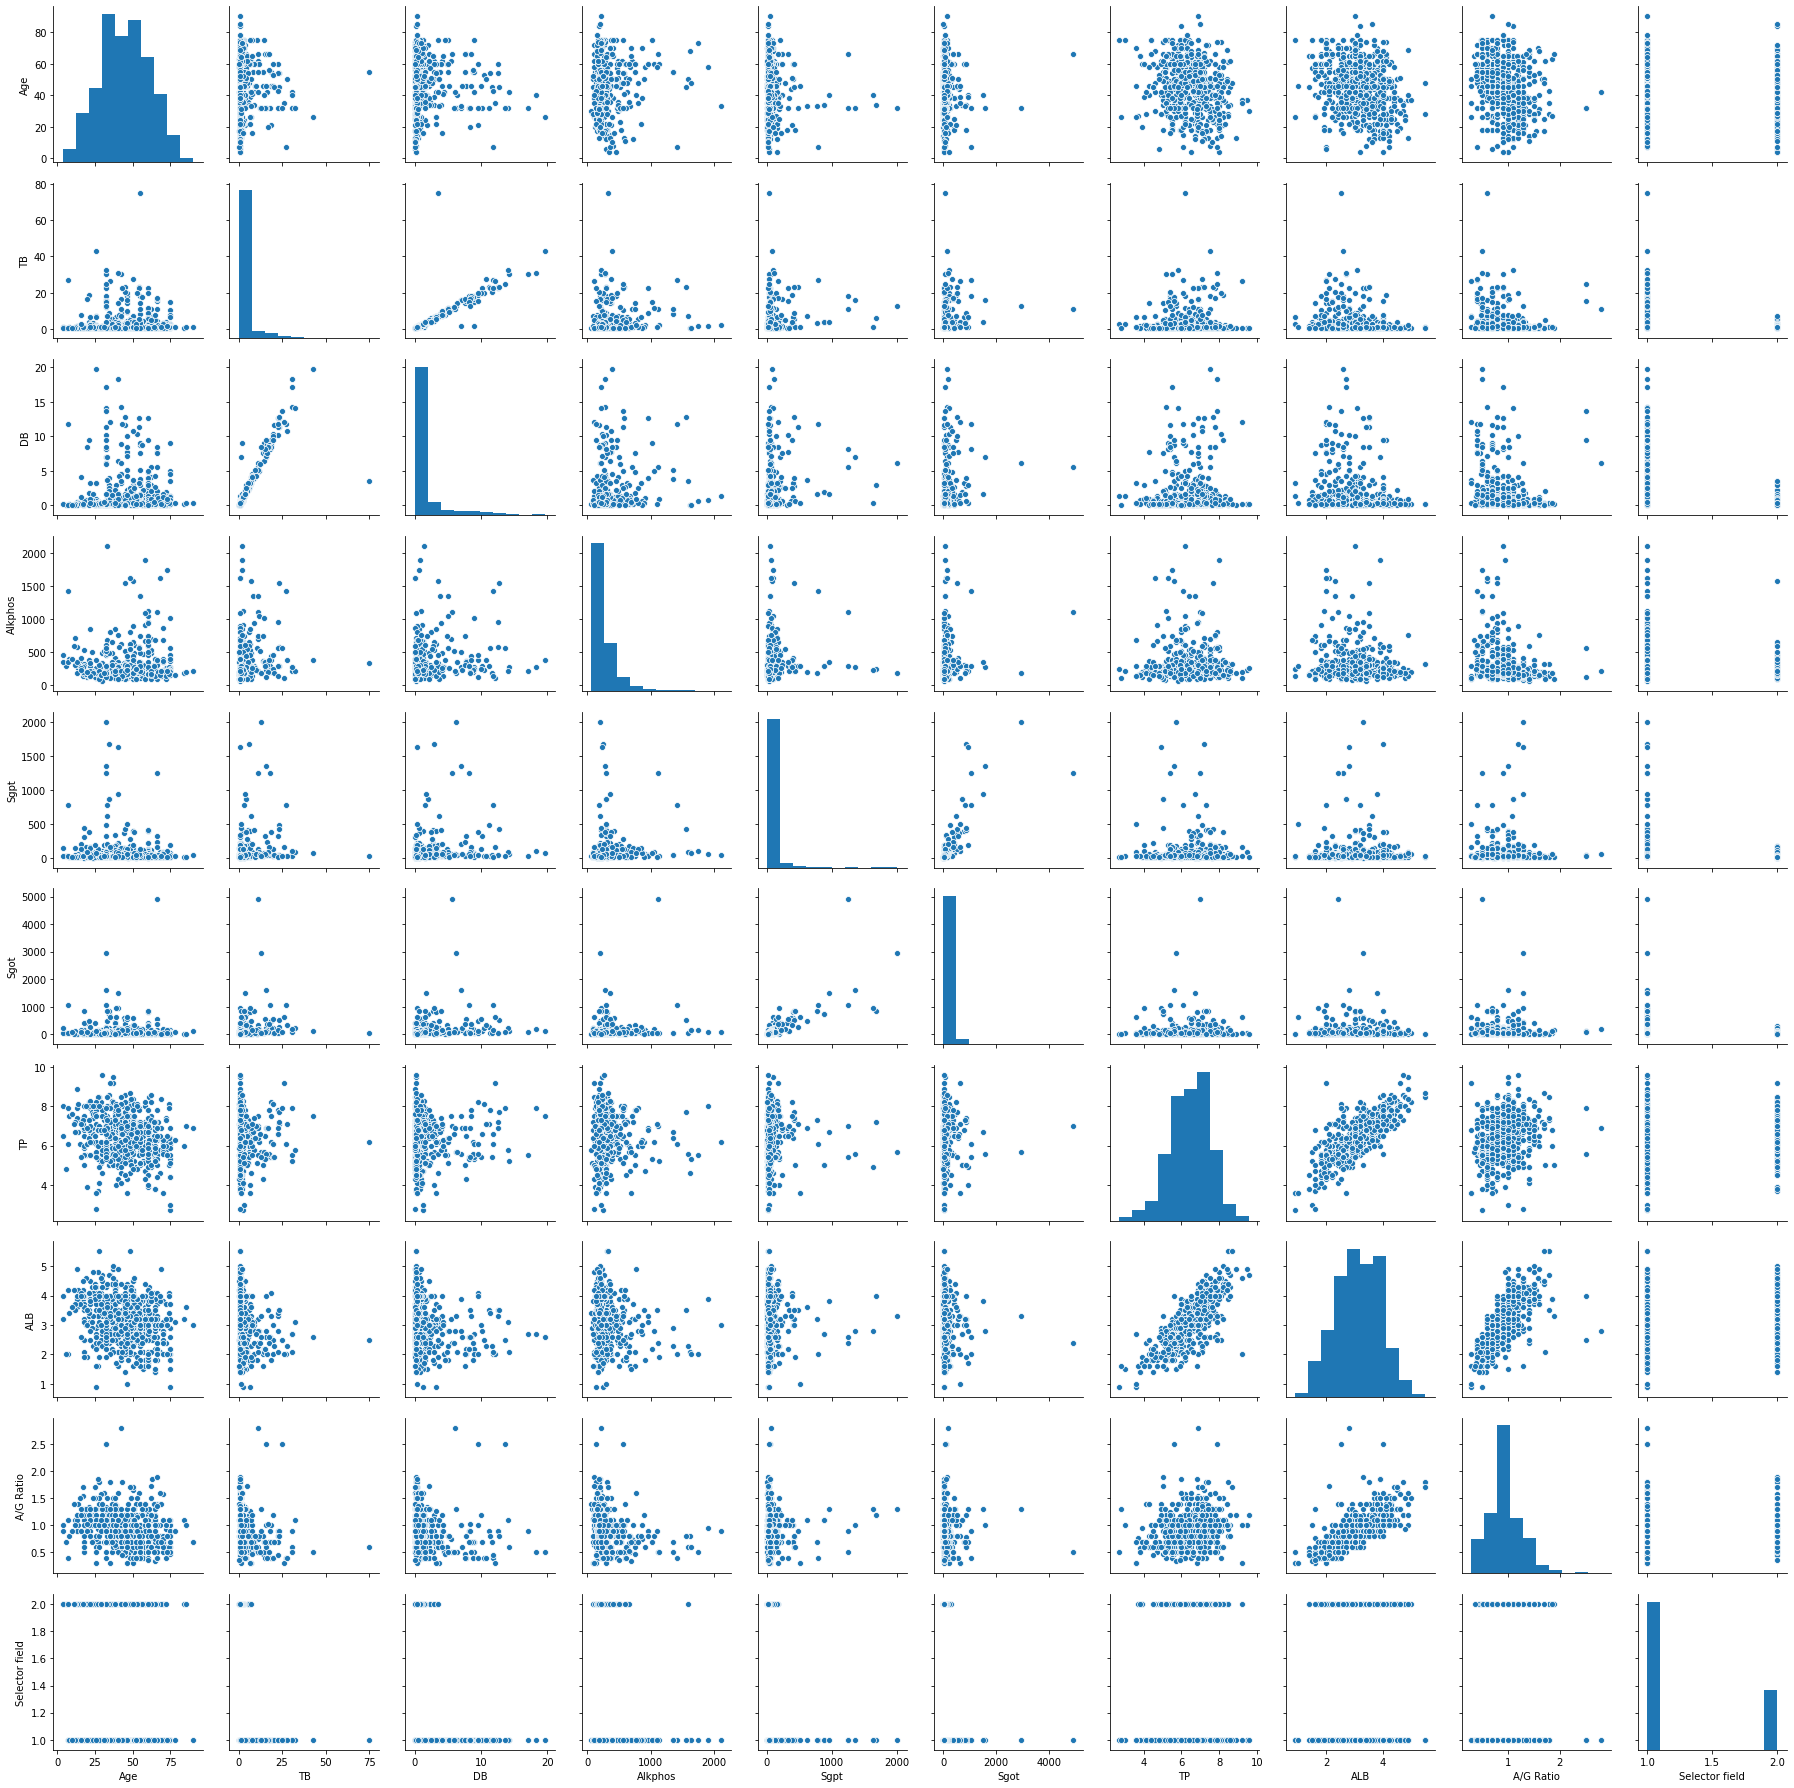

In [17]:
sns.pairplot(df)

In [18]:
def partition(x):
    if x =='Male':
        return 0
    return 1

df['Gender'] = df['Gender'].map(partition)

# BUILDING SVM MODEL

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  confusion_matrix
from sklearn.svm import SVC


In [20]:
y = df['Selector field']
X = df.drop('Selector field', axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df['Selector field'])

In [22]:
train_mean = X_train.mean()
train_std = X_train.std()

In [23]:
X_train = (X_train - train_mean) / train_std

In [24]:
X_test.describe()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.00000,117.000000,117.000000,117.000000
mean,43.914530,0.256410,2.929060,1.357265,283.803419,87.700855,110.34188,6.522222,3.152991,0.985470
std,17.433407,0.438529,4.698405,2.491860,256.827201,224.611859,308.63169,1.043131,0.716862,0.398758
min,4.000000,0.000000,0.600000,0.100000,97.000000,12.000000,11.00000,2.700000,0.900000,0.400000
25%,32.000000,0.000000,0.800000,0.200000,171.000000,22.000000,25.00000,6.000000,2.700000,0.700000
50%,42.000000,0.000000,1.100000,0.400000,205.000000,35.000000,45.00000,6.600000,3.100000,0.900000
75%,56.000000,1.000000,2.600000,1.200000,282.000000,72.000000,92.00000,7.200000,3.700000,1.120000
max,85.000000,1.000000,25.000000,13.700000,1896.000000,2000.000000,2946.00000,8.900000,4.900000,2.800000


In [25]:
from sklearn import svm
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X_train, y_train)
    grid_search.best_params_
    return grid_search.best_params_

In [28]:
svClassifier=SVC(kernel='rbf',probability=True)
svClassifier.fit(X_train,y_train)

G:\Anacoda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
svc_param_selection(X_train,y_train,5)

{'C': 0.001, 'gamma': 0.001}

In [30]:
model = SVC(C=0.001, gamma=0.001)
model.fit(X_train, y_train)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
y_train_pred = model.predict(X_train)

In [32]:
y_pred = model.predict(X_test)

In [33]:
confusion_matrix(y_test, y_pred)

array([[83,  0],
       [34,  0]], dtype=int64)